# Projection

In [4]:
import numpy as np
import matplotlib.pyplot as plt 
import time

## Point to line

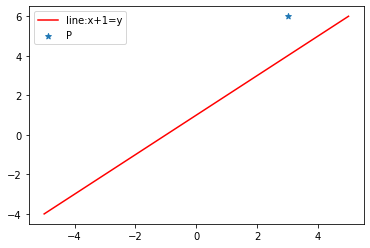

In [5]:
P = np.array([3,6])#point on y = 2x
x = np.linspace(-5,5,10)
y = x+1
plt.figure()
plt.scatter(P[0],P[1],marker='*',label='P') 
plt.plot(x,y,color='r',label='line:x+1=y')
plt.legend()
plt.show()

In [6]:
def point_proj(P,A,B,C):#P =point , Ax+By+C=0 line
    #direction of line
    a = np.array([-C/A,0])-np.array([0,-C/B])
    b = P-np.array([0,-C/B]) 
    return np.array([0,-C/B])+((np.dot(a,b)/np.dot(a,a))*a)

In [7]:
P2 = point_proj(P,1,-1,1)

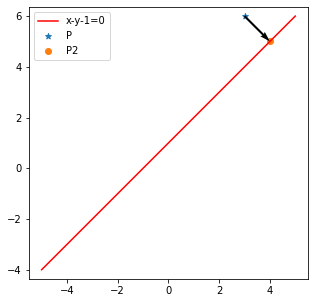

In [8]:
fig, ax = plt.subplots(figsize=(5, 5)) 
ax.axis('equal')
ax.scatter(P[0],P[1],marker='*',label='P') 
ax.plot(x,y,color='r',label='x-y-1=0')
ax.scatter(P2[0],P2[1],marker='o',label='P2')
ax.quiver(*P,*P2-P,scale=1, scale_units='xy', angles='xy')
plt.legend()
plt.show()

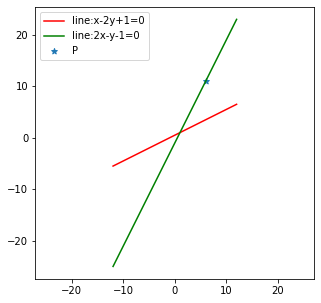

In [9]:
P = np.array([6,11])#point on line:2x-y-1=0
x = np.linspace(-12,12,100)
y = 0.5*x+0.5
y2 = 2*x-1
#plt.figure()
fig, ax = plt.subplots(figsize=(5, 5)) 
ax.axis('equal')
ax.scatter(P[0],P[1],marker='*',label='P') 
ax.plot(x,y,color='r',label='line:x-2y+1=0')
ax.plot(x,y2,color='g',label='line:2x-y-1=0')
plt.legend()
plt.show()


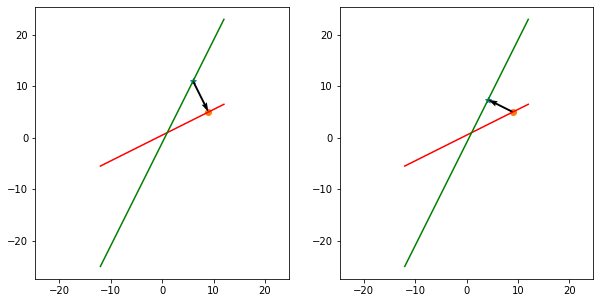

In [10]:
P2 = point_proj(P,1,-2,1)
fig, ax = plt.subplots(1,2,figsize=(10, 5)) 
ax[0].axis('equal')
ax[0].scatter(P[0],P[1],marker='*',label='P') 
ax[0].plot(x,y,color='r')
ax[0].plot(x,y2,color='g')
ax[0].scatter(P2[0],P2[1],marker='o',label='P2')
ax[0].quiver(*P,*P2-P,scale=1, scale_units='xy', angles='xy')

P = point_proj(P2,2,-1,-1)
ax[1].axis('equal')
ax[1].scatter(P[0],P[1],marker='*',label='P') 
ax[1].plot(x,y,color='r')
ax[1].plot(x,y2,color='g')
ax[1].scatter(P2[0],P2[1],marker='o',label='P2')
ax[1].quiver(*P2,*P-P2,scale=1, scale_units='xy', angles='xy')
plt.show()

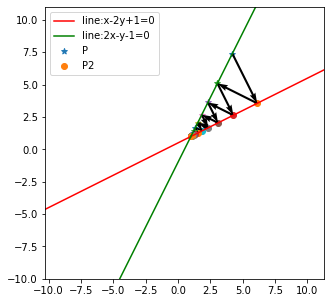

In [11]:
#point on y=2x+1 > projection on y=x+1
P2 = point_proj(P,1,-2,1)
fig, ax = plt.subplots(figsize=(5, 5)) 
ax.axis('equal')
ax.set_xlim([-10, 11])
ax.set_ylim([-10, 11])
ax.scatter(P[0],P[1],marker='*',label='P') 
ax.plot(x,y,color='r',label='line:x-2y+1=0')
ax.plot(x,y2,color='g',label='line:2x-y-1=0')
ax.scatter(P2[0],P2[1],marker='o',label='P2')
ax.quiver(*P,*P2-P,scale=1, scale_units='xy', angles='xy')
for i in range(50):
    P = point_proj(P2,2,-1,-1)
    ax.scatter(P[0],P[1],marker='*')
    ax.quiver(*P2,*P-P2,scale=1, scale_units='xy', angles='xy')
    if np.all(P2==P):
        break
    P2 = point_proj(P,1,-2,1)
    ax.scatter(P2[0],P2[1],marker='o')
    ax.quiver(*P,*P2-P,scale=1, scale_units='xy', angles='xy')
    
plt.legend()
plt.show()

In [12]:
P2

array([1., 1.])

In [13]:
def alt_proj(a1,b1,c1,a2,b2,c2):
    #P = np.array([0,-c1/b1])
    P = np.array([20,20])
    P2 = P
    P0 = P+10
    i=0
    fig, ax = plt.subplots(1,2,figsize=(10, 5)) 
    ax[0].axis('equal')
    while np.linalg.norm(P0-P2,2)>0.01:
        P0 = P2
        a = a2
        b = b2
        c = c2
        P1 = point_proj(P0,a,b,c)
        a = a1
        b = b1
        c = c1
        P2 = point_proj(P1,a,b,c)
        ax[0].scatter(P2[0],P2[1])
        cr = np.linalg.norm(P2-P1,2)/np.linalg.norm(P1,2)
        ax[1].scatter(i,cr)
        i = i+1
        #print(f"solution = {P2} Conversation Rate = {np.linalg.norm(P2-P1,2)/np.linalg.norm(P1-P0,2)}")
    plt.show()
    return P2

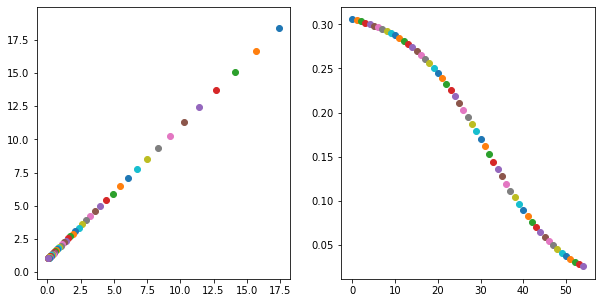

array([0.05883622, 1.05883622])

In [14]:
alt_proj(1,-1,1,2,-1,1)

# Least Square

In [15]:
x = np.linspace(0,10,10)
y = x + np.random.rand(10)

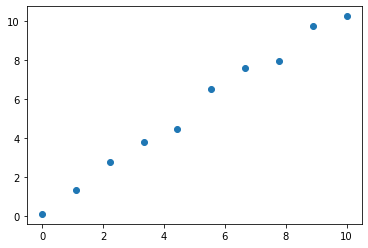

In [16]:
plt.scatter(x,y)

In [17]:
A = np.array([x,np.ones(len(x))]).T

In [18]:
[m,c]= np.linalg.pinv(A)@np.reshape(y,[len(y),1])

In [19]:
m,c

(array([1.03637424]), array([0.28597485]))

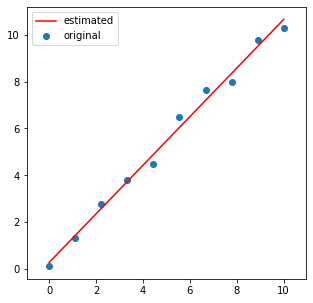

In [20]:
fig, ax = plt.subplots(figsize=(5, 5)) 
ax.axis('equal')
plt.scatter(x,y,label='original')
y_e = m*x+c
plt.plot(x,y_e,'r',label='estimated')
plt.legend()
plt.show()

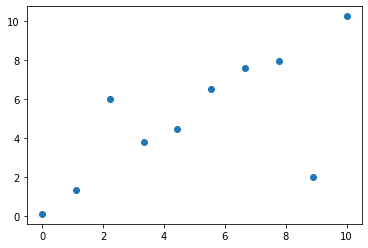

In [21]:
y[2]=6
y[8]=2
plt.scatter(x,y)

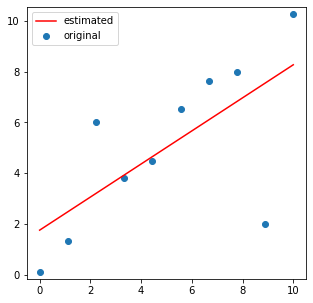

In [22]:
A = np.array([x,np.ones(len(x))]).T
[m,c]= np.linalg.pinv(A)@np.reshape(y,[len(y),1])
fig, ax = plt.subplots(figsize=(5, 5)) 
ax.axis('equal')
plt.scatter(x,y,label='original')
y_e = m*x+c
plt.plot(x,y_e,'r',label='estimated')
plt.legend()
plt.show()